# Decision Tree Exercises

# Part I

In [1]:
# imports

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from graphviz import Graph

from acquire import get_titanic_data
from practice_titanic_prep import prep_titanic_data

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

## Titanic Dataset

#### Acquire

In [2]:
# acquire titanic data
df = get_titanic_data()

In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
df.shape

(891, 13)

#### Prep

In [5]:
# prep titanic data
train, validate, test = prep_titanic_data(df)

In [6]:
train.shape, validate.shape, test.shape

((534, 13), (178, 13), (179, 13))

In [7]:
train.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,male,29.0,0,0,7.8958,Cherbourg,1,1,0,0


In [8]:
# drop duplicates of dummy variables and passenger_id since we don't need them for this model
train.drop(columns = ['passenger_id', 'sex', 'embark_town'], inplace=True)
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


In [9]:
# do the same for validate and test
validate.drop(columns = ['passenger_id', 'sex', 'embark_town'], inplace=True)
test.drop(columns = ['passenger_id', 'sex', 'embark_town'], inplace=True)

## 1.

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

#### Baseline

In [10]:
# check to see most commonly occuring result for target
train.survived.value_counts(normalize=True)

0    0.616105
1    0.383895
Name: survived, dtype: float64

In [11]:
# create new column for baseline, this will be didn't survive since that occured 62% of the time in train dataset
train['baseline'] = 0

In [12]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
455,1,3,29.0,0,0,7.8958,1,1,0,0,0


In [13]:
# Check baseline accuracy
(train.survived == train.baseline).mean()

0.6161048689138576

In [14]:
# drop baseline column as no longer needed
train.drop(columns='baseline', inplace = True)

In [15]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


## 2.

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

#### X and y

In [16]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [17]:
X_train.head(1)

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,29.0,0,0,7.8958,1,1,0,0


In [18]:
y_train.head(1)

455    1
Name: survived, dtype: int64

### First Model Depth 3

#### Make DT model and predictions

In [19]:
# create Decision Tree object
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [20]:
# fit the model
# model.fit(X, y)
clf = clf.fit(X_train, y_train)

In [21]:
# visualize Decision Tree using Graphviz
# dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
# graph = graphviz.Source(dot_data) 

# graph.render('titanic_decision_tree', view=True)

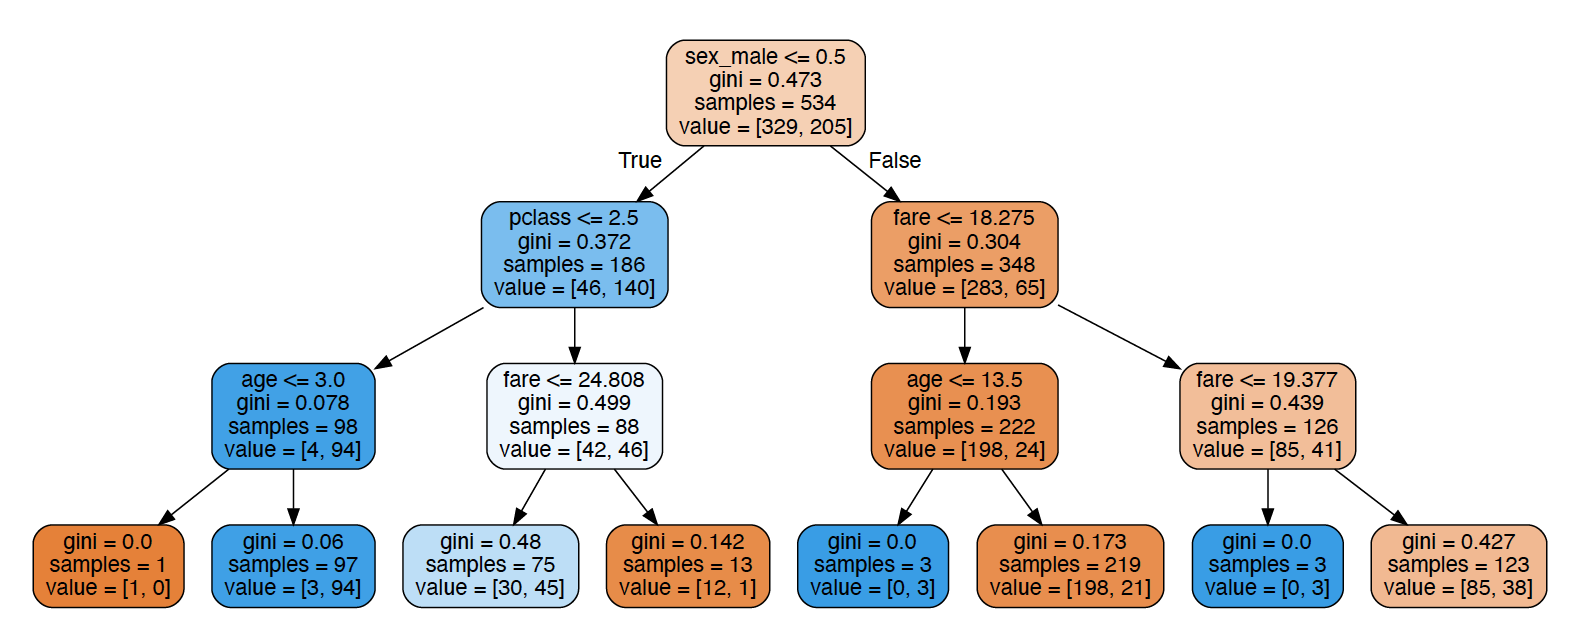

In [22]:
# make prediction on train observations

y_pred = clf.predict(X_train)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [23]:
# Estimate probability

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[:5]

array([[0.90410959, 0.09589041],
       [0.03092784, 0.96907216],
       [0.69105691, 0.30894309],
       [0.69105691, 0.30894309],
       [0.90410959, 0.09589041]])

In [24]:
train.survived.head() # doesn't look too accurate so far

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

## 3.

#### Evaluate model on train (in-sample)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [25]:
# what is model score?  Same as accuracy

In [26]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[296,  33],
       [ 60, 145]])

In [27]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,296,33
1,60,145


In [28]:
# classification report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       329
           1       0.81      0.71      0.76       205

    accuracy                           0.83       534
   macro avg       0.82      0.80      0.81       534
weighted avg       0.82      0.83      0.82       534



In [29]:
# different way to check accuracy
accuracy_score(y_train, y_pred)

0.8258426966292135

In [30]:
# another way
clf.score(X_train, y_train)

0.8258426966292135

***Performs better than baseline***

## 4.

#### Evaluate model on validate (out-of-sample)

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
***I am assuming this should be done on the validate data set (out of sample)***

In [31]:
# check accuracy of model on validate set
clf.score(X_validate, y_validate)

0.8089887640449438

***Not hugely different from accuracy of training set, model does not appear to be overfit***

In [32]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.74        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



**Classification report above provides accuracy, precision, recall (which is also true positive rate), f1-score, and support.**

In [33]:
# create crosstab to make confusion matric

pd.crosstab(y_validate, y_pred)

col_0,0,1
survived,,
0,95,15
1,19,49


In [34]:
cnf_matrix = confusion_matrix(y_validate, y_pred)
cnf_matrix

array([[95, 15],
       [19, 49]])

In [35]:
# find false positive rate FP / (FP + TN)
FPR = 15 / (15 + 95)
FPR

0.13636363636363635

In [36]:
# find metrics using confusion matrix

In [37]:
def conf_matrix_math(y_actual, y_pred):
    
    cnf_matrix = confusion_matrix(y_actual, y_pred)

    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    return print(f'Confusion Matrix:\n\n{cnf_matrix}\n\nCommon Evaluation Metrics:\n\nTPR is {TPR[1]:.2f}\nTNR is {TNR[1]:.2f}\nPPV is {PPV[1]:.2f}\nNPV is {NPV[1]:.2f}\nFPR is {FPR[1]:.2f}\nFNR is {FNR[1]:.2f}\nFDR is {FDR[1]:.2f}\nACC is {ACC[1]:.2f}')

In [38]:
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[95 15]
 [19 49]]

Common Evaluation Metrics:

TPR is 0.72
TNR is 0.86
PPV is 0.77
NPV is 0.83
FPR is 0.14
FNR is 0.28
FDR is 0.23
ACC is 0.81


## 5.

Run through steps 2-4 using a different max_depth value.

### Second Model Depth 7

#### Made DT model and predictions

In [39]:
# create Decision Tree object
clf2 = DecisionTreeClassifier(max_depth=7, random_state=123)

In [40]:
# model.fit(X, y)
clf2 = clf2.fit(X_train, y_train)

In [41]:
# visualize tree
# dot_data = export_graphviz(clf2, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
# graph = graphviz.Source(dot_data) 

# graph.render('titanic_decision_tree', view=True)

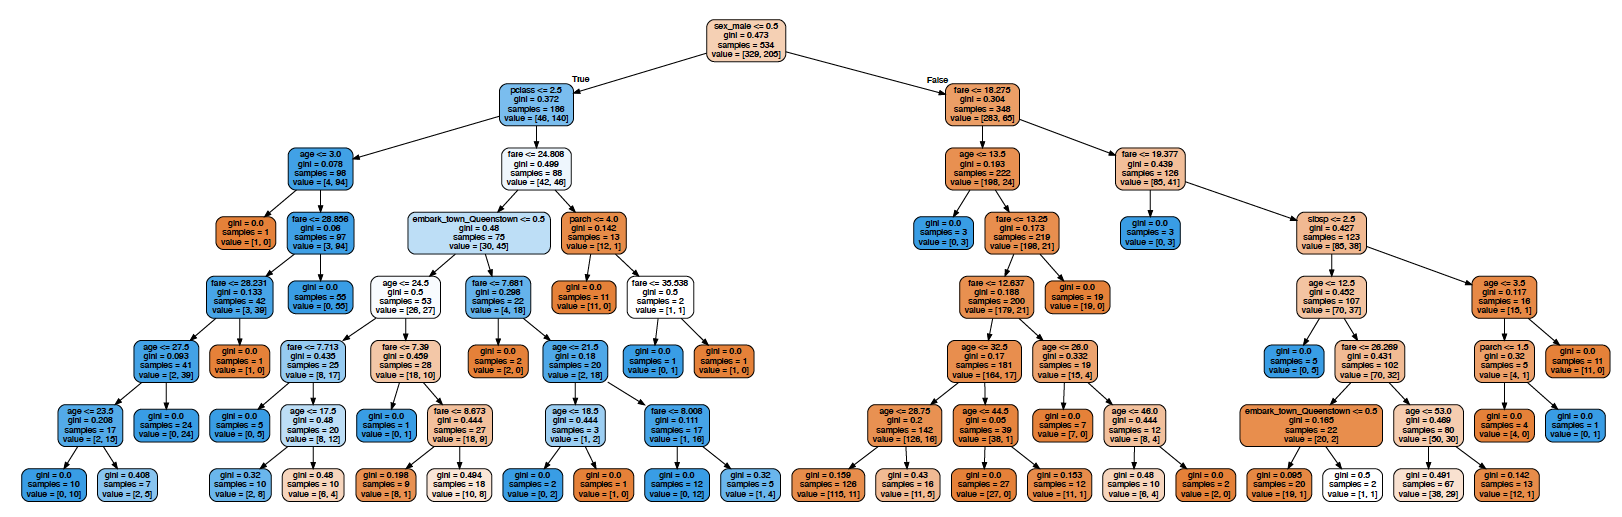

In [42]:
# make prediction on train obeservations
y_pred = clf2.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 0, 0])

In [43]:
y_pred_proba = clf2.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.6875    , 0.3125    ],
       [0.        , 1.        ],
       [0.92307692, 0.07692308],
       [0.56716418, 0.43283582],
       [0.91269841, 0.08730159]])

In [44]:
train.survived.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

#### Evaluate model on train (in-sample)

In [45]:
clf2.score(X_train, y_train)

0.8670411985018727

In [46]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,324,5
1,66,139


In [47]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       329
           1       0.97      0.68      0.80       205

    accuracy                           0.87       534
   macro avg       0.90      0.83      0.85       534
weighted avg       0.88      0.87      0.86       534



In [48]:
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[324   5]
 [ 66 139]]

Common Evaluation Metrics:

TPR is 0.68
TNR is 0.98
PPV is 0.97
NPV is 0.83
FPR is 0.02
FNR is 0.32
FDR is 0.03
ACC is 0.87


#### Evaluate model on validate (out-of-sample)

In [49]:
# now look at validate (out of sample)
# check accuracy of model on validate set
clf2.score(X_validate, y_validate)

0.7921348314606742

***Not hugely different from accuracy of training set, model does not appear to be overfit***

In [50]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf2.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.78      0.63      0.70        68

    accuracy                           0.79       178
   macro avg       0.79      0.76      0.77       178
weighted avg       0.79      0.79      0.79       178



In [51]:
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[98 12]
 [25 43]]

Common Evaluation Metrics:

TPR is 0.63
TNR is 0.89
PPV is 0.78
NPV is 0.80
FPR is 0.11
FNR is 0.37
FDR is 0.22
ACC is 0.79


### Model Comparison

## 6.

Which model performs better on your in-sample data?

***Second model (clf2) with depth of 7 performs better in terms of accuracy on in sample data (train)***

## 7.

Which model performs best on your out-of-sample data, the validate set?

***First model (clf) with depth of 3 performs better in terms of accuracy on in out-of-sample data (validate)***

### Compare max depths using for loop

In [52]:
# Let's compare in-sample to out-of-sample for different max depths using a for loop
metrics = []

for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
# df["difference"] = round(df.train_accuracy - df.validate_accuracy, 2)
df

,max_depth,train_accuracy,validate_accuracy
0,1,0.792135,0.775281
1,2,0.792135,0.775281
2,3,0.825843,0.808989
3,4,0.825843,0.808989
4,5,0.857678,0.792135
5,6,0.861423,0.792135
6,7,0.867041,0.792135
7,8,0.900749,0.792135
8,9,0.906367,0.775281
9,10,0.928839,0.775281


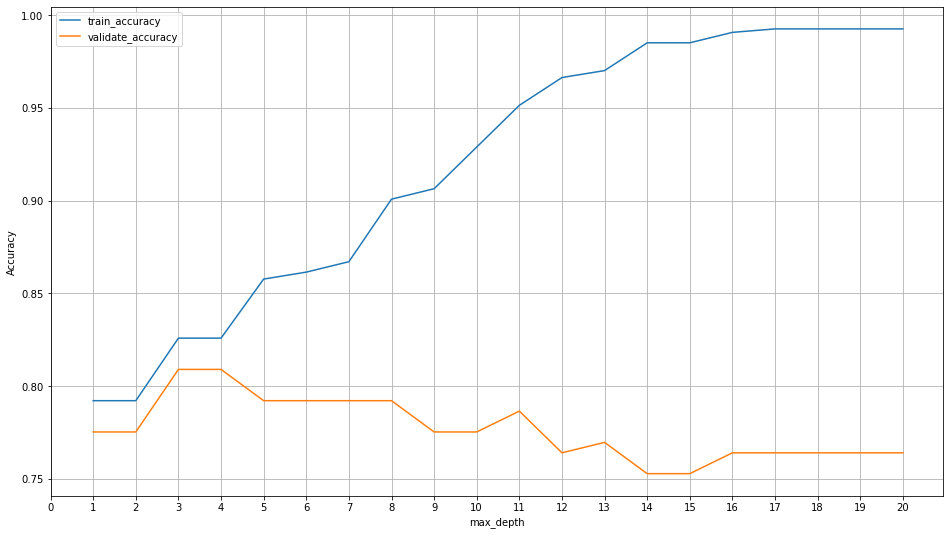

In [53]:
# plot the data
df.set_index('max_depth').plot(figsize = (16,9))
# plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [54]:
df["difference"] = round(df.train_accuracy - df.validate_accuracy, 2)
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.792135,0.775281,0.02
1,2,0.792135,0.775281,0.02
2,3,0.825843,0.808989,0.02
3,4,0.825843,0.808989,0.02
4,5,0.857678,0.792135,0.07
5,6,0.861423,0.792135,0.07
6,7,0.867041,0.792135,0.07
7,8,0.900749,0.792135,0.11
8,9,0.906367,0.775281,0.13
9,10,0.928839,0.775281,0.15


***It seems that models with max depth of 3 or 4 perform best in terms of maximizing accuracy and not overfitting***

# Part II

## 1.

Work through these same exercises using the Telco dataset.

## Telco Dataset

#### Acquire

In [55]:
# acquire telco data set
from acquire_telco import get_telco_data

df = get_telco_data()

In [56]:
df.head(1)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check


#### Prep

In [57]:
# prep telco data
from prepare_telco import prepare_telco

train, validate, test = prepare_telco(df)

In [58]:
train.head(1)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6169,Female,No,Yes,No,72,Yes,Yes,Yes,No,Yes,...,1,1,0,1,0,0,1,0,1,0


In [59]:
obj_cols = train.select_dtypes(include='object').columns.tolist()
obj_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [60]:
# drop dummied columns
train.drop(columns=obj_cols, inplace=True)
train.head(1)

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6169,72,105.5,7544.0,0,0,1,0,1,0,1,...,1,1,0,1,0,0,1,0,1,0


Might be better in preparation to use replace function to change cat cols where there are 3 categories and one is no internet service to 1 and 0 and ignore no internet options since this info should be in another column (if not, just keep one and change the rest)

In [61]:
# do the same for validate and test
validate.drop(columns=obj_cols, inplace=True)
test.drop(columns=obj_cols, inplace=True)

#### Find baseline

In [62]:
train.churn_Yes.value_counts(normalize=True)

0    0.734675
1    0.265325
Name: churn_Yes, dtype: float64

In [63]:
train['baseline'] = 0

In [64]:
train.head(1)

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,baseline
6169,72,105.5,7544.0,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0


In [65]:
# accuracy of baseline
(train.churn_Yes == train.baseline).mean()

0.7346745562130178

In [66]:
# drop baseline column
train.drop(columns='baseline', inplace=True)

#### X and y

In [67]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes'])
y_test = test.churn_Yes

### First Model Depth 10

#### Make DT model and predictions

In [68]:
clf = DecisionTreeClassifier(max_depth=10, random_state=123)

In [69]:
clf = clf.fit(X_train, y_train)

In [70]:
# dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
# graph = graphviz.Source(dot_data) 

# graph.render('telco_decision_tree', view=True)

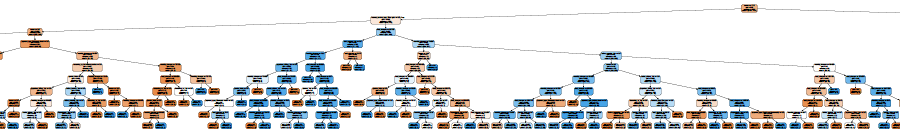

In [71]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 1, 0, 1], dtype=uint8)

In [72]:
# estimate probability
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[1.        , 0.        ],
       [0.93582888, 0.06417112],
       [0.21428571, 0.78571429],
       [1.        , 0.        ],
       [0.41666667, 0.58333333]])

In [73]:
# compare to real values
train.churn_Yes.head()

6169    0
3290    0
3615    1
6309    0
856     0
Name: churn_Yes, dtype: uint8

#### Evaluate model on train (in-sample)

In [74]:
# accuracy
clf.score(X_train, y_train)

0.8847337278106508

In [75]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3104
           1       0.79      0.77      0.78      1121

    accuracy                           0.88      4225
   macro avg       0.85      0.85      0.85      4225
weighted avg       0.88      0.88      0.88      4225



In [76]:
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[2877  227]
 [ 260  861]]

Common Evaluation Metrics:

TPR is 0.77
TNR is 0.93
PPV is 0.79
NPV is 0.92
FPR is 0.07
FNR is 0.23
FDR is 0.21
ACC is 0.88


#### Evaluate model on validate (out-of-sample)

In [77]:
# accuracy
clf.score(X_validate, y_validate)

0.7700496806245565

In [78]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

In [79]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.57      0.55      0.56       374

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



In [80]:
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[879 156]
 [168 206]]

Common Evaluation Metrics:

TPR is 0.55
TNR is 0.85
PPV is 0.57
NPV is 0.84
FPR is 0.15
FNR is 0.45
FDR is 0.43
ACC is 0.77


### Second Model Depth 5

#### Make DT model and predictions

In [81]:
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

In [82]:
clf = clf.fit(X_train, y_train)

In [83]:
# dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
# graph = graphviz.Source(dot_data) 

# graph.render('telco_decision_tree', view=True)

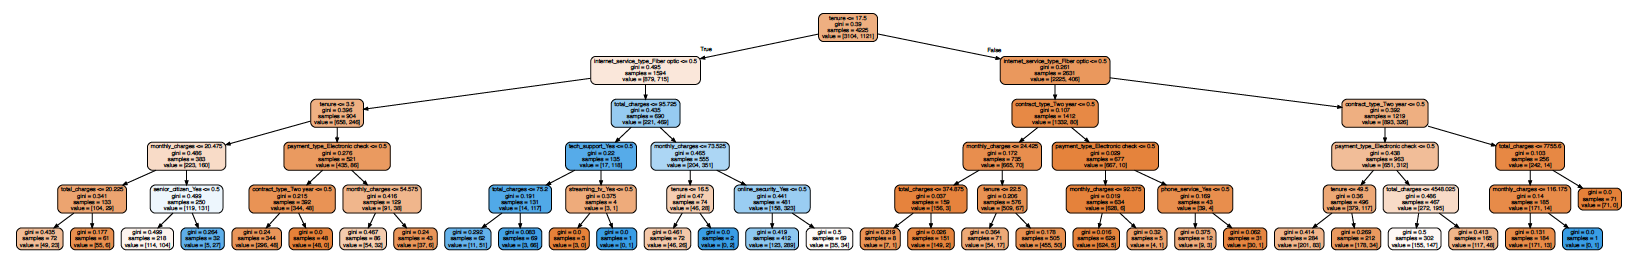

In [84]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [85]:
# estimate probability
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.92934783, 0.07065217],
       [0.9009901 , 0.0990099 ],
       [0.62790698, 0.37209302],
       [0.92934783, 0.07065217],
       [0.70774648, 0.29225352]])

In [86]:
# compare to real values
train.churn_Yes.head()

6169    0
3290    0
3615    1
6309    0
856     0
Name: churn_Yes, dtype: uint8

#### Evaluate model on train (in-sample)

In [87]:
# accuracy
clf.score(X_train, y_train)

0.8044970414201184

In [88]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      3104
           1       0.75      0.39      0.51      1121

    accuracy                           0.80      4225
   macro avg       0.78      0.67      0.70      4225
weighted avg       0.80      0.80      0.78      4225



In [89]:
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[2962  142]
 [ 684  437]]

Common Evaluation Metrics:

TPR is 0.39
TNR is 0.95
PPV is 0.75
NPV is 0.81
FPR is 0.05
FNR is 0.61
FDR is 0.25
ACC is 0.80


#### Evaluate model on validate (out-of-sample)

In [90]:
# accuracy
clf.score(X_validate, y_validate)

0.7856635911994322

In [91]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

In [92]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1035
           1       0.69      0.35      0.47       374

    accuracy                           0.79      1409
   macro avg       0.74      0.65      0.67      1409
weighted avg       0.77      0.79      0.76      1409



In [93]:
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[975  60]
 [242 132]]

Common Evaluation Metrics:

TPR is 0.35
TNR is 0.94
PPV is 0.69
NPV is 0.80
FPR is 0.06
FNR is 0.65
FDR is 0.31
ACC is 0.79


### Model Comparison

**First model with depth of 10 peforms better on in-sample data in terms of accuracy**

**Second model with depth of 5 peforms better on out-of-sample data in terms of accuracy**

### Compare max depths using for loop

In [94]:
# Let's compare in-sample to out-of-sample for different max depths using a for loop
metrics = []

for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
# df["difference"] = round(df.train_accuracy - df.validate_accuracy, 2)
df

,max_depth,train_accuracy,validate_accuracy
0,1,0.734675,0.734564
1,2,0.793373,0.783534
2,3,0.793373,0.783534
3,4,0.800947,0.777857
4,5,0.804497,0.785664
5,6,0.816331,0.786373
6,7,0.830769,0.794180
7,8,0.846391,0.781405
8,9,0.865089,0.777857
9,10,0.884734,0.770050


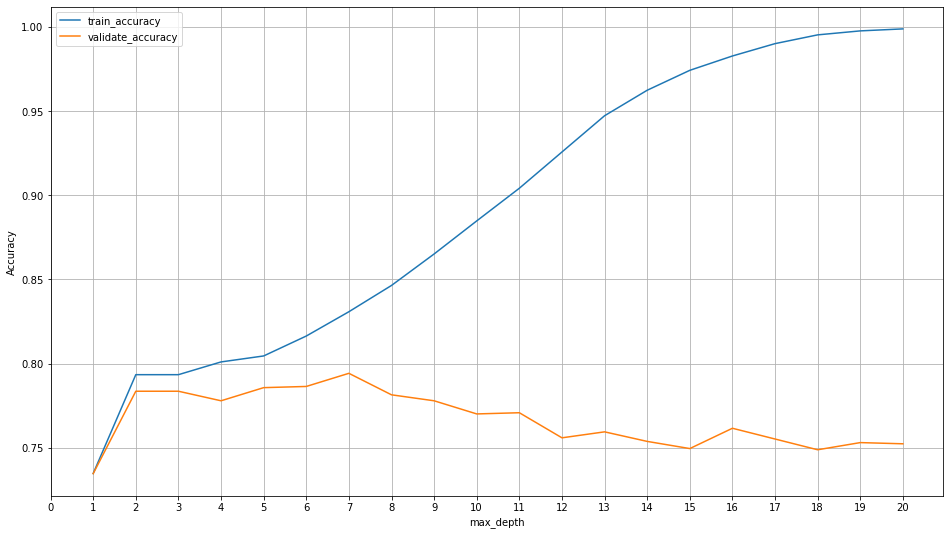

In [95]:
# plot the data
df.set_index('max_depth').plot(figsize = (16,9))
# plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [96]:
df["difference"] = round(df.train_accuracy - df.validate_accuracy, 2)
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734675,0.734564,0.00
1,2,0.793373,0.783534,0.01
2,3,0.793373,0.783534,0.01
3,4,0.800947,0.777857,0.02
4,5,0.804497,0.785664,0.02
5,6,0.816331,0.786373,0.03
6,7,0.830769,0.794180,0.04
7,8,0.846391,0.781405,0.06
8,9,0.865089,0.777857,0.09
9,10,0.884734,0.770050,0.11


***It seems that model with max depth of 7 performs best in terms of maximizing accuracy and not overfitting***

## 2.

Experiment with this model on other datasets with a higher number of output classes.

## Iris Dataset

#### Acquire

In [97]:
df = data('iris')

In [98]:
df.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa


#### Prepare

In [99]:
df.columns = [col.lower().replace('.', '_') for col in df]

In [100]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa


In [101]:
df.shape

(150, 5)

In [102]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [103]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

In [104]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

#### Find basline

In [105]:
train.species.value_counts()

versicolor    28
virginica     28
setosa        28
Name: species, dtype: int64

**Baseline accuracy will be 1/3 or 33%**

#### X and y

In [106]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species

### First Model Depth 3

#### Make DT Model and predictions

In [107]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [108]:
clf = clf.fit(X_train, y_train)

In [109]:
# dot_data = export_graphviz(clf, feature_names= X_train.columns, class_names=clf.classes_, rounded=True, filled=True, out_file=None)
# graph = graphviz.Source(dot_data) 

# graph.render('iris_decision_tree', view=True)

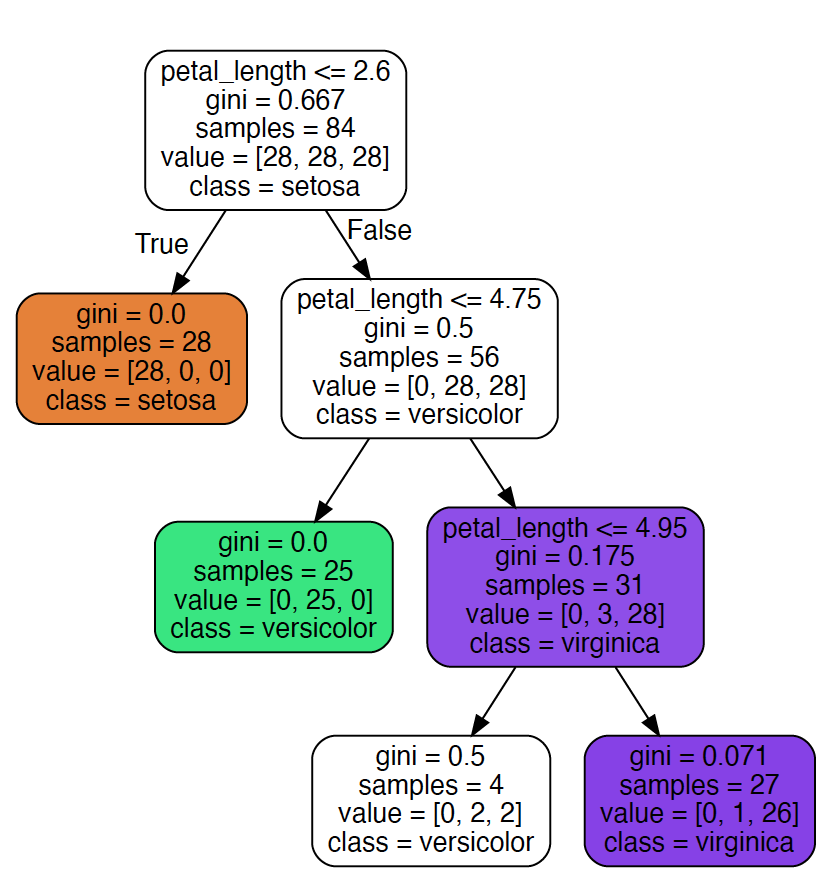

In [110]:
y_pred = clf.predict(X_train)
y_pred[0:5].tolist()

['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa']

In [111]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03703704, 0.96296296],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ]])

In [112]:
train.species.head()

80     versicolor
37         setosa
134     virginica
96     versicolor
19         setosa
Name: species, dtype: object

#### Evaluate model on train (in-sample)

In [113]:
# accuracy 
clf.score(X_train, y_train)

0.9642857142857143

In [114]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.93      0.96      0.95        28
   virginica       0.96      0.93      0.95        28

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



In [115]:
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[28  0  0]
 [ 0 27  1]
 [ 0  2 26]]

Common Evaluation Metrics:

TPR is 0.96
TNR is 0.96
PPV is 0.93
NPV is 0.98
FPR is 0.04
FNR is 0.04
FDR is 0.07
ACC is 0.96


#### Evaluate model on validate (out-of-sample)

In [116]:
# accuracy
clf.score(X_validate, y_validate)

0.9444444444444444

In [117]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

In [118]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



In [119]:
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[12  0  0]
 [ 0 12  0]
 [ 0  2 10]]

Common Evaluation Metrics:

TPR is 1.00
TNR is 0.92
PPV is 0.86
NPV is 1.00
FPR is 0.08
FNR is 0.00
FDR is 0.14
ACC is 0.94


### Second Model Depth 4

#### Make DT Model and predictions

In [120]:
clf = DecisionTreeClassifier(max_depth=4, random_state=123)

In [121]:
clf = clf.fit(X_train, y_train)

In [122]:
# dot_data = export_graphviz(clf, feature_names= X_train.columns, class_names=clf.classes_, rounded=True, filled=True, out_file=None)
# graph = graphviz.Source(dot_data) 

# graph.render('iris_decision_tree', view=True)

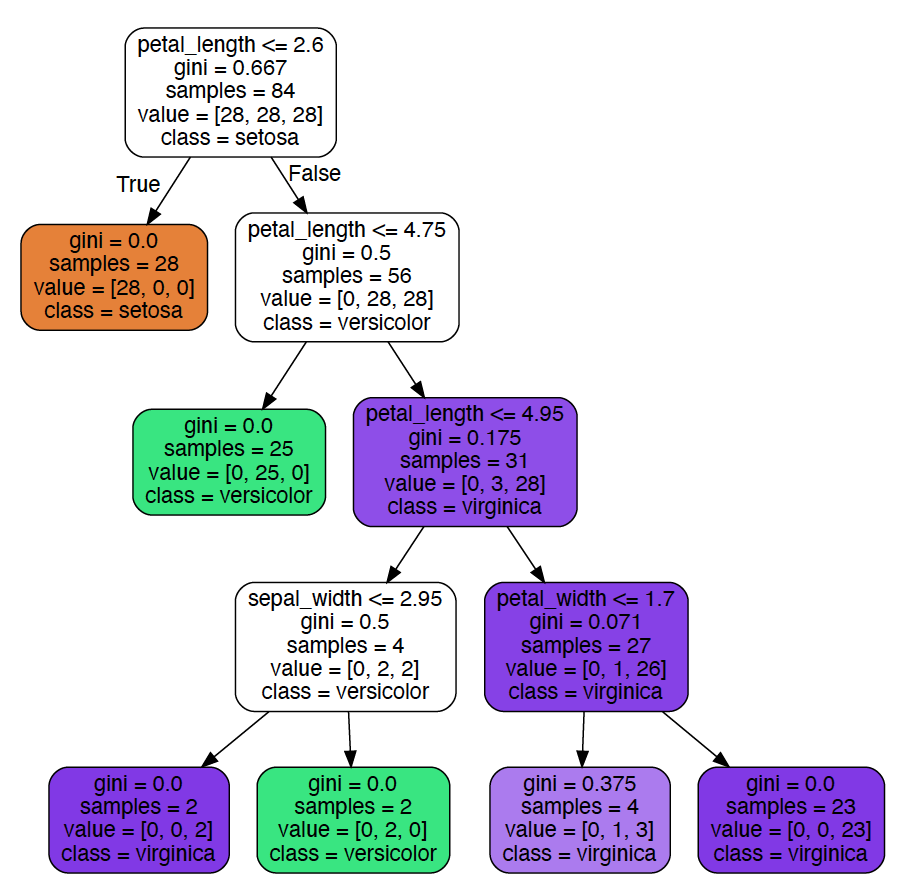

In [123]:
y_pred = clf.predict(X_train)
y_pred[0:5].tolist()

['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa']

In [124]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.25, 0.75],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [125]:
train.species.head()

80     versicolor
37         setosa
134     virginica
96     versicolor
19         setosa
Name: species, dtype: object

#### Evaluate model on train (in-sample)

In [126]:
# accuracy 
clf.score(X_train, y_train)

0.9880952380952381

In [127]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      0.96      0.98        28
   virginica       0.97      1.00      0.98        28

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [128]:
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[28  0  0]
 [ 0 27  1]
 [ 0  0 28]]

Common Evaluation Metrics:

TPR is 0.96
TNR is 1.00
PPV is 1.00
NPV is 0.98
FPR is 0.00
FNR is 0.04
FDR is 0.00
ACC is 0.99


#### Evaluate model on validate (out-of-sample)

In [129]:
# accuracy
clf.score(X_validate, y_validate)

0.9722222222222222

In [130]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

In [131]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [132]:
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[12  0  0]
 [ 0 12  0]
 [ 0  1 11]]

Common Evaluation Metrics:

TPR is 1.00
TNR is 0.96
PPV is 0.92
NPV is 1.00
FPR is 0.04
FNR is 0.00
FDR is 0.08
ACC is 0.97


### Model Comparison

**Second model with depth of 4 peforms better on in-sample data in terms of accuracy**

**Second model with depth of 4 peforms better on out-of-sample data in terms of accuracy**

### Compare max depths using for loop

In [133]:
# Let's compare in-sample to out-of-sample for different max depths using a for loop
metrics = []

for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
# df["difference"] = round(df.train_accuracy - df.validate_accuracy, 2)
df

,max_depth,train_accuracy,validate_accuracy
0,1,0.666667,0.666667
1,2,0.964286,0.972222
2,3,0.964286,0.944444
3,4,0.988095,0.972222
4,5,0.988095,0.944444
5,6,1.000000,0.972222
6,7,1.000000,0.972222
7,8,1.000000,0.972222
8,9,1.000000,0.972222
9,10,1.000000,0.972222


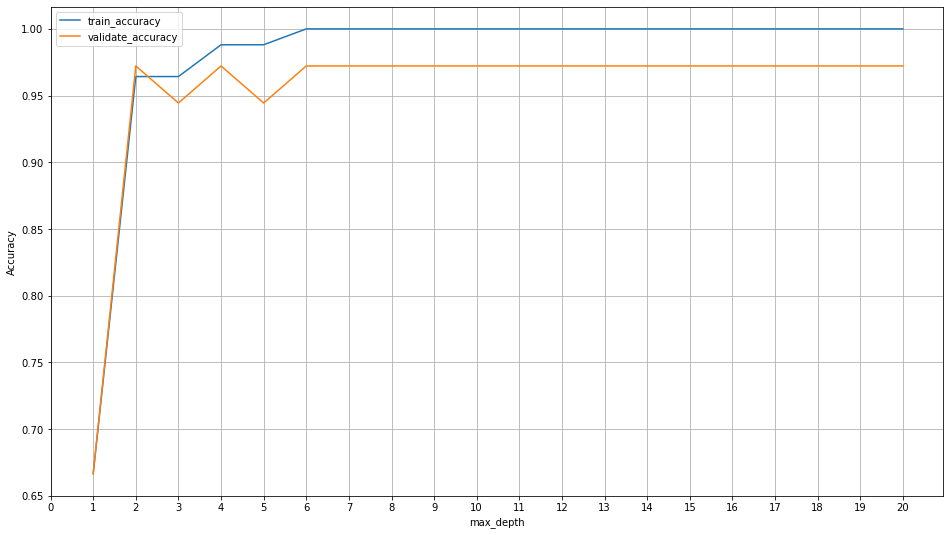

In [134]:
# plot the data
df.set_index('max_depth').plot(figsize = (16,9))
# plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [135]:
df["difference"] = round(df.train_accuracy - df.validate_accuracy, 2)
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.666667,0.666667,0.00
1,2,0.964286,0.972222,-0.01
2,3,0.964286,0.944444,0.02
3,4,0.988095,0.972222,0.02
4,5,0.988095,0.944444,0.04
5,6,1.000000,0.972222,0.03
6,7,1.000000,0.972222,0.03
7,8,1.000000,0.972222,0.03
8,9,1.000000,0.972222,0.03
9,10,1.000000,0.972222,0.03


***It seems that models with max depth of 6 is best in terms of maximizing accuracy and not adding unnecessary additional layers of depth without improving performance***

# Random Forest Exercises 

In [136]:
from sklearn.ensemble import RandomForestClassifier

## Titanic Dataset

#### Acquire

In [137]:
# acquire titanic data
df = get_titanic_data()

In [138]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [139]:
df.shape

(891, 13)

#### Prep

In [140]:
# prep titanic data
train, validate, test = prep_titanic_data(df)

In [141]:
train.shape, validate.shape, test.shape

((534, 13), (178, 13), (179, 13))

In [142]:
train.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,male,29.0,0,0,7.8958,Cherbourg,1,1,0,0


In [143]:
# drop duplicates of dummy variables and passenger_id since we don't need them for this model
train.drop(columns = ['passenger_id', 'sex', 'embark_town'], inplace=True)
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


In [144]:
# do the same for validate and test
validate.drop(columns = ['passenger_id', 'sex', 'embark_town'], inplace=True)
test.drop(columns = ['passenger_id', 'sex', 'embark_town'], inplace=True)

#### Baseline

In [145]:
# check to see most commonly occuring result for target
train.survived.value_counts(normalize=True)

0    0.616105
1    0.383895
Name: survived, dtype: float64

In [146]:
# create new column for baseline, this will be didn't survive since that occured 62% of the time in train dataset
train['baseline'] = 0

In [147]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
455,1,3,29.0,0,0,7.8958,1,1,0,0,0


In [148]:
# Check baseline accuracy
(train.survived == train.baseline).mean()

0.6161048689138576

In [149]:
# drop baseline column as no longer needed
train.drop(columns='baseline', inplace = True)

In [150]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


#### X and y

In [151]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [152]:
X_train.head(1)

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,29.0,0,0,7.8958,1,1,0,0


In [153]:
y_train.head(1)

455    1
Name: survived, dtype: int64

## 1. 

Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

### First Model with m_s_l = 1 and max_depth = 10 

#### Create, fit, and transform model

In [154]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [155]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [156]:
print(rf.feature_importances_)

[0.09501698 0.1993064  0.05045658 0.03170521 0.25747179 0.02055448
 0.30055177 0.01748824 0.02744855]


In [157]:
X_train.columns.tolist()

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [158]:
# make prediction on train observations

y_pred = rf.predict(X_train)
y_pred[:5]

array([0, 1, 0, 1, 0])

In [159]:
# Estimate probability

y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[:5]

array([[0.59241112, 0.40758888],
       [0.        , 1.        ],
       [0.80849562, 0.19150438],
       [0.38298193, 0.61701807],
       [0.97167493, 0.02832507]])

In [160]:
train.survived.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

## 2. 

Evaluate your results using the model score, confusion matrix, and classification report.

#### Evaluate model on train (in-sample)

In [161]:
# accuracy
rf.score(X_train, y_train)

0.9625468164794008

In [162]:
#pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

In [163]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       329
           1       1.00      0.90      0.95       205

    accuracy                           0.96       534
   macro avg       0.97      0.95      0.96       534
weighted avg       0.96      0.96      0.96       534



In [164]:
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[329   0]
 [ 20 185]]

Common Evaluation Metrics:

TPR is 0.90
TNR is 1.00
PPV is 1.00
NPV is 0.94
FPR is 0.00
FNR is 0.10
FDR is 0.00
ACC is 0.96


## 3. 

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

#### Evaluate model on validate (out-of-sample)

In [165]:
# accuracy
rf.score(X_validate, y_validate)

0.8258426966292135

In [166]:
y_pred = rf.predict(X_validate)

In [167]:
#pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

In [168]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.78      0.75      0.77        68

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.83       178



In [169]:
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[96 14]
 [17 51]]

Common Evaluation Metrics:

TPR is 0.75
TNR is 0.87
PPV is 0.78
NPV is 0.85
FPR is 0.13
FNR is 0.25
FDR is 0.22
ACC is 0.83


## 4. 

Run through steps increasing your min_samples_leaf and decreasing your max_depth.

### Second Model with m_s_l = 5 and max_depth = 5 

#### Create, fit, and transform model

In [170]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [171]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=123)

In [172]:
print(rf.feature_importances_)

[0.13127129 0.0852086  0.03893945 0.02107484 0.17515229 0.02088691
 0.48542817 0.01661406 0.02542439]


In [173]:
X_train.columns.tolist()

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [174]:
# make prediction on train observations

y_pred = rf.predict(X_train)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [175]:
# Estimate probability

y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[:5]

array([[0.84350763, 0.15649237],
       [0.05098788, 0.94901212],
       [0.69594523, 0.30405477],
       [0.56498259, 0.43501741],
       [0.92241425, 0.07758575]])

In [176]:
train.survived.head() # doesn't look too accurate so far

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

#### Evaluate model on train (in-sample)

Evaluate your results using the model score, confusion matrix, and classification report.

In [177]:
# accuracy
rf.score(X_train, y_train)

0.8614232209737828

In [178]:
#pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

In [179]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       329
           1       0.92      0.70      0.80       205

    accuracy                           0.86       534
   macro avg       0.88      0.83      0.85       534
weighted avg       0.87      0.86      0.86       534



In [180]:
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[316  13]
 [ 61 144]]

Common Evaluation Metrics:

TPR is 0.70
TNR is 0.96
PPV is 0.92
NPV is 0.84
FPR is 0.04
FNR is 0.30
FDR is 0.08
ACC is 0.86


#### Evaluate model on validate (out-of-sample)

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [181]:
# accuracy
rf.score(X_validate, y_validate)

0.8089887640449438

In [182]:
y_pred = rf.predict(X_validate)

In [183]:
#pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

In [184]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.79      0.68      0.73        68

    accuracy                           0.81       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.81      0.81      0.81       178



In [185]:
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[98 12]
 [22 46]]

Common Evaluation Metrics:

TPR is 0.68
TNR is 0.89
PPV is 0.79
NPV is 0.82
FPR is 0.11
FNR is 0.32
FDR is 0.21
ACC is 0.81


## 5. 

#### Model Comparison

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

**First model has much higher accuracy on in-sample data due to the min_sample_leaves argument being set to 1 and the max depth being higher**

## 6. 

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

**First model has higher accuracy on both train and validate, but second model is less overfit with a smaller difference between accuracies from training to validate data sets**

### Third Model with m_s_l = 1, max_depth = 10, and n_estimators = 200

#### Create, fit, and transform model

In [186]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=200,
                            max_depth=10, 
                            random_state=123)

In [187]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=123)

#### Evaluate model on train (in-sample)

Evaluate your results using the model score, confusion matrix, and classification report.

In [188]:
# accuracy
rf.score(X_train, y_train)

0.9662921348314607

In [189]:
# make prediction on train observations
y_pred = rf.predict(X_train)

In [190]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       329
           1       1.00      0.91      0.95       205

    accuracy                           0.97       534
   macro avg       0.97      0.96      0.96       534
weighted avg       0.97      0.97      0.97       534



#### Evaluate model on validate (out-of-sample)

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [191]:
# accuracy
rf.score(X_validate, y_validate)

0.8258426966292135

In [192]:
y_pred = rf.predict(X_validate)

In [193]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.78      0.75      0.77        68

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.83       178



In [194]:
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[96 14]
 [17 51]]

Common Evaluation Metrics:

TPR is 0.75
TNR is 0.87
PPV is 0.78
NPV is 0.85
FPR is 0.13
FNR is 0.25
FDR is 0.22
ACC is 0.83


***Changing only the n_estimators didn't make much of a difference when comparing metrics from this model to metrics from the first model***

### Experiment with hyper parameters using for loops

#### Only changing max depth argument

In [195]:
metrics = []

for i in range(1, 21):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
# df["difference"] = df.train_accuracy - df.validate_accuracy
# df

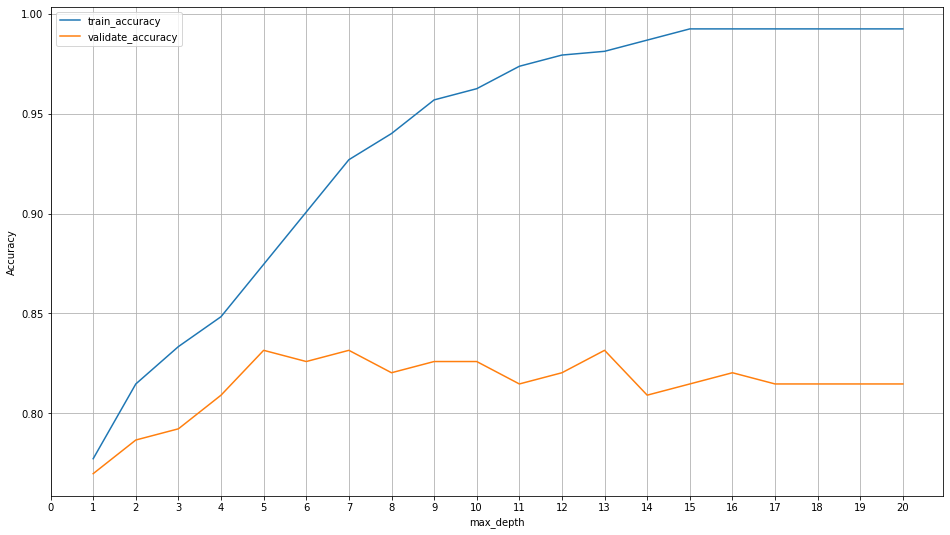

In [196]:
# plot the data
df.set_index('max_depth').plot(figsize = (16,9))
# plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [197]:
df = df.set_index('max_depth')
df["difference"] = round(df.train_accuracy - df.validate_accuracy, 2)
df

,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.777154,0.769663,0.01
2,0.814607,0.786517,0.03
3,0.833333,0.792135,0.04
4,0.848315,0.808989,0.04
5,0.874532,0.831461,0.04
6,0.900749,0.825843,0.07
7,0.926966,0.831461,0.10
8,0.940075,0.820225,0.12
9,0.956929,0.825843,0.13


***Seems model with max depth of 5 is best in terms of maximizing accuracy while avoiding overfitting***

#### Only changing min samples leaf argument

In [198]:
metrics = []

for i in range(1, 26):
    # Make the model
    forest = RandomForestClassifier(min_samples_leaf=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
# df["difference"] = df.train_accuracy - df.validate_accuracy
# df

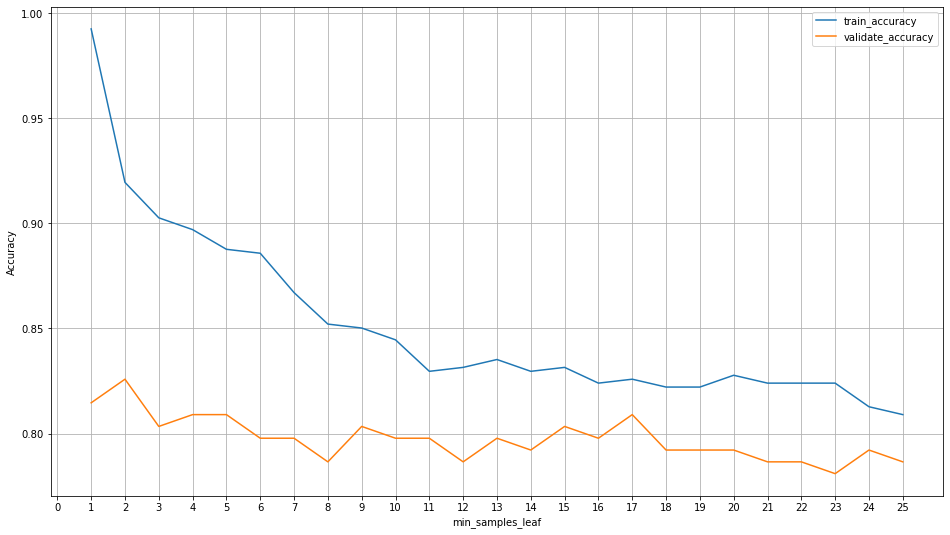

In [199]:
# plot the data
df.set_index('min_samples_leaf').plot(figsize = (16,9))
# plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,26,1))
plt.grid()

In [200]:
df = df.set_index('min_samples_leaf')
df["difference"] = round(df.train_accuracy - df.validate_accuracy, 2)
df

,train_accuracy,validate_accuracy,difference
min_samples_leaf,,,
1,0.992509,0.814607,0.18
2,0.919476,0.825843,0.09
3,0.902622,0.803371,0.10
4,0.897004,0.808989,0.09
5,0.887640,0.808989,0.08
6,0.885768,0.797753,0.09
7,0.867041,0.797753,0.07
8,0.852060,0.786517,0.07
9,0.850187,0.803371,0.05


***No clear winner to me here. 4, 5, 9?***

#### Only changing n_estimators argument

In [201]:
metrics = []

for i in range(10, 300, 10):
    # Make the model
    forest = RandomForestClassifier(n_estimators=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "n_estimators": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
# df["difference"] = df.train_accuracy - df.validate_accuracy
# df

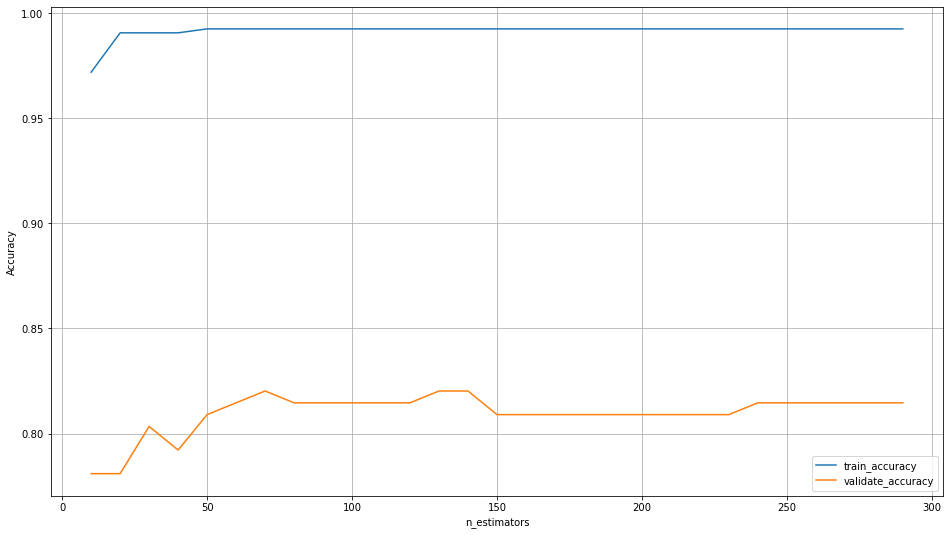

In [202]:
# plot the data
df.set_index('n_estimators').plot(figsize = (16,9))
# plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
#plt.xticks(np.arange(0,26,1))
plt.grid()

In [203]:
df = df.set_index('n_estimators')
df["difference"] = round(df.train_accuracy - df.validate_accuracy, 2)
df

,train_accuracy,validate_accuracy,difference
n_estimators,,,
10,0.971910,0.780899,0.19
20,0.990637,0.780899,0.21
30,0.990637,0.803371,0.19
40,0.990637,0.792135,0.20
50,0.992509,0.808989,0.18
60,0.992509,0.814607,0.18
70,0.992509,0.820225,0.17
80,0.992509,0.814607,0.18
90,0.992509,0.814607,0.18


***130, 140 seem to be best***

#### Increasing min_samples_leaf, decreasing max_depth

In [204]:
metrics = []
max_depth = 21

for i in range(1, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = round(df.train_accuracy - df.validate_accuracy, 2)
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,20,0.992509,0.814607,0.18
1,2,19,0.919476,0.825843,0.09
2,3,18,0.902622,0.803371,0.10
3,4,17,0.897004,0.808989,0.09
4,5,16,0.887640,0.808989,0.08
5,6,15,0.885768,0.797753,0.09
6,7,14,0.867041,0.797753,0.07
7,8,13,0.850187,0.786517,0.06
8,9,12,0.850187,0.803371,0.05
9,10,11,0.844569,0.797753,0.05


In [205]:
import seaborn as sns

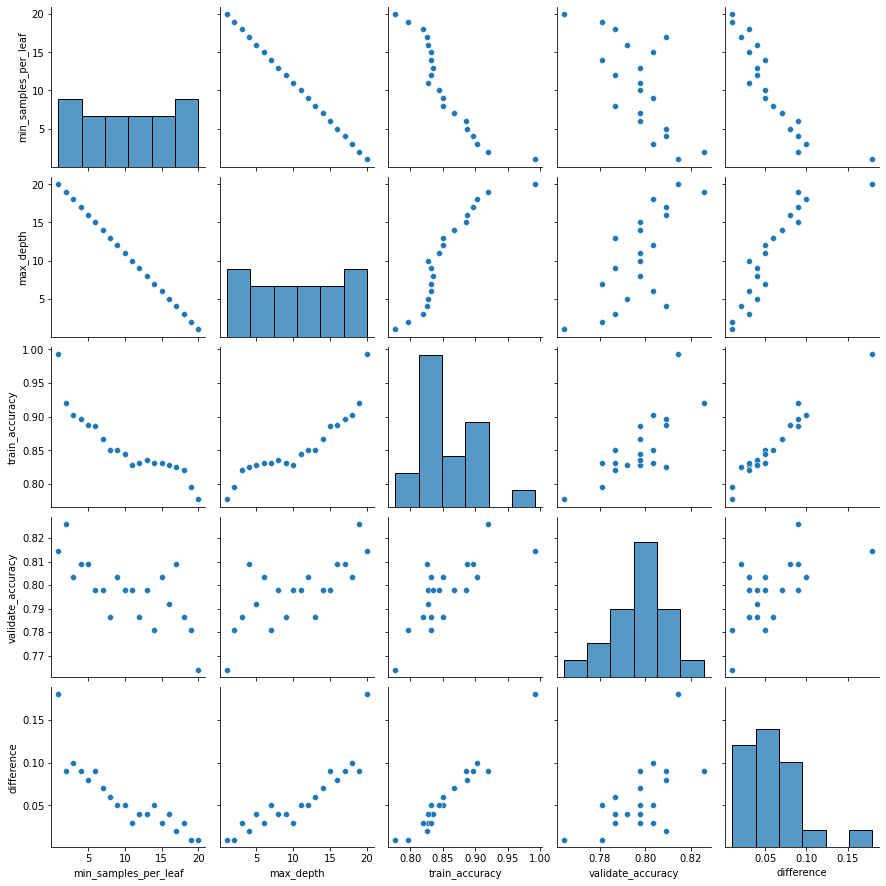

In [206]:
sns.pairplot(df)

***No clear winner to me here. Not sure how to choose best combination***

#### Increasing min_samples_leaf, increasing max_depth

In [207]:
metrics = []

for i in range(1, 21):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, min_samples_leaf=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "min_samples_per_leaf": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = round(df.train_accuracy - df.validate_accuracy, 2)
df

,max_depth,min_samples_per_leaf,train_accuracy,validate_accuracy,difference
0,1,1,0.777154,0.769663,0.01
1,2,2,0.816479,0.786517,0.03
2,3,3,0.835206,0.786517,0.05
3,4,4,0.840824,0.820225,0.02
4,5,5,0.861423,0.808989,0.05
5,6,6,0.865169,0.803371,0.06
6,7,7,0.857678,0.803371,0.05
7,8,8,0.852060,0.780899,0.07
8,9,9,0.850187,0.803371,0.05
9,10,10,0.844569,0.797753,0.05


***4 and 4 looks best in terms of accuracy and not overfitting***

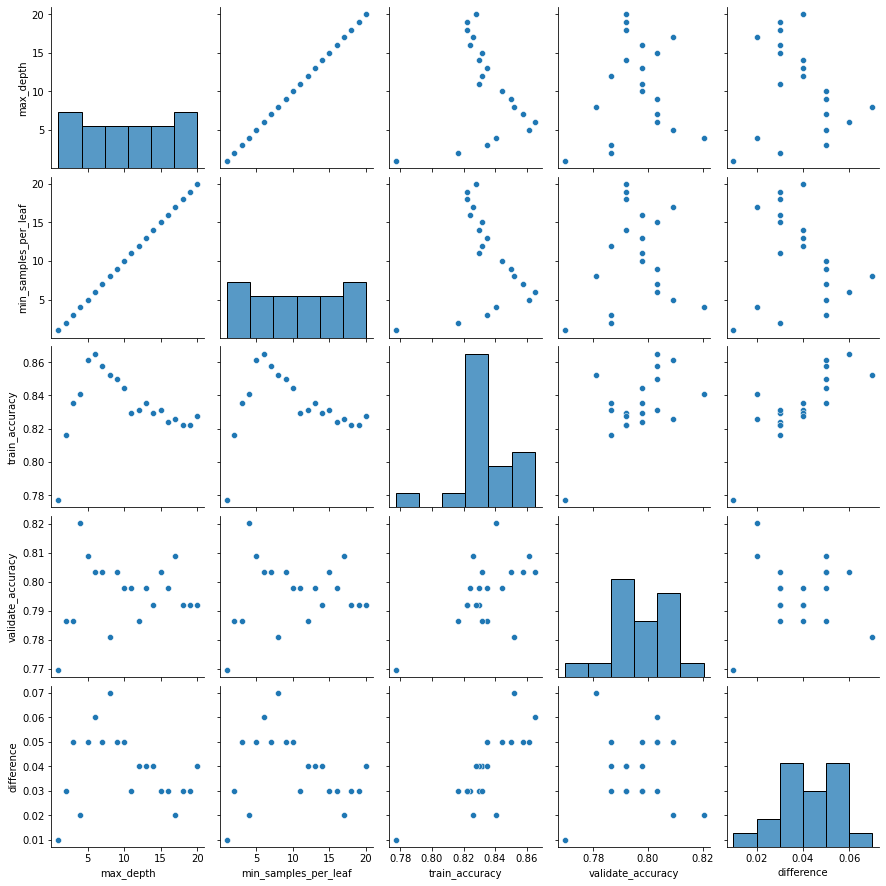

In [208]:
sns.pairplot(df)

# KNN Exercises

Continue working in your model file with the titanic dataset.

In [209]:
# reuse X and y for train, validate, and test from above
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,29.0,0,0,7.8958,1,1,0,0
380,1,42.0,0,0,227.5250,1,0,0,0
492,1,55.0,0,0,30.5000,1,1,0,1
55,1,27.0,0,0,35.5000,1,1,0,1
243,3,22.0,0,0,7.1250,1,1,0,1


In [210]:
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

## 1. 

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [211]:
from sklearn.neighbors import KNeighborsClassifier

### First KNN Model, k=5

#### Create, Fit, and Transform Model

In [212]:
# create
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [213]:
# fit
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [214]:
# transform
y_pred = knn.predict(X_train)

## 2.

#### Evaluate model on train (in-sample)

Evaluate your results using the model score, confusion matrix, and classification report.

In [215]:
# model score
knn.score(X_train, y_train)

0.8033707865168539

In [216]:
# confusion matrix
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[284  45]
 [ 60 145]]

Common Evaluation Metrics:

TPR is 0.71
TNR is 0.86
PPV is 0.76
NPV is 0.83
FPR is 0.14
FNR is 0.29
FDR is 0.24
ACC is 0.80


In [217]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       329
           1       0.76      0.71      0.73       205

    accuracy                           0.80       534
   macro avg       0.79      0.79      0.79       534
weighted avg       0.80      0.80      0.80       534



## 3.

#### Evaluate model on validate (out-of-sample)

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [218]:
# transform for validate set
y_pred = knn.predict(X_validate)

In [219]:
# model score
knn.score(X_validate, y_validate)

0.6685393258426966

In [220]:
# confusion matrix
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[83 27]
 [32 36]]

Common Evaluation Metrics:

TPR is 0.53
TNR is 0.75
PPV is 0.57
NPV is 0.72
FPR is 0.25
FNR is 0.47
FDR is 0.43
ACC is 0.67


In [221]:
# classification report
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       110
           1       0.57      0.53      0.55        68

    accuracy                           0.67       178
   macro avg       0.65      0.64      0.64       178
weighted avg       0.66      0.67      0.67       178



## 4.

Run through steps 2-4 setting k to 10

### Second KNN Model, k=10

#### Create, Fit, and Transform Model

In [222]:
# create
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [223]:
# fit
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [224]:
# transform
y_pred = knn.predict(X_train)

#### Evaluate model on train (in-sample)

Evaluate your results using the model score, confusion matrix, and classification report.

In [225]:
# model score
knn.score(X_train, y_train)

0.7415730337078652

In [226]:
# confusion matrix
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[297  32]
 [106  99]]

Common Evaluation Metrics:

TPR is 0.48
TNR is 0.90
PPV is 0.76
NPV is 0.74
FPR is 0.10
FNR is 0.52
FDR is 0.24
ACC is 0.74


In [227]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       329
           1       0.76      0.48      0.59       205

    accuracy                           0.74       534
   macro avg       0.75      0.69      0.70       534
weighted avg       0.74      0.74      0.73       534



#### Evaluate model on validate (out-of-sample)

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [228]:
# transform for validate set
y_pred = knn.predict(X_validate)

In [229]:
# model score
knn.score(X_validate, y_validate)

0.7078651685393258

In [230]:
# confusion matrix
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[92 18]
 [34 34]]

Common Evaluation Metrics:

TPR is 0.50
TNR is 0.84
PPV is 0.65
NPV is 0.73
FPR is 0.16
FNR is 0.50
FDR is 0.35
ACC is 0.71


In [231]:
# classification report
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       110
           1       0.65      0.50      0.57        68

    accuracy                           0.71       178
   macro avg       0.69      0.67      0.67       178
weighted avg       0.70      0.71      0.70       178



## 5.

Run through setps 2-4 setting k to 20

### Third KNN Model, k=20

#### Create, Fit, and Transform Model

In [232]:
# create
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [233]:
# fit
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [234]:
# transform
y_pred = knn.predict(X_train)

#### Evaluate model on train (in-sample)

Evaluate your results using the model score, confusion matrix, and classification report.

In [235]:
# model score
knn.score(X_train, y_train)

0.7247191011235955

In [236]:
# confusion matrix
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[300  29]
 [118  87]]

Common Evaluation Metrics:

TPR is 0.42
TNR is 0.91
PPV is 0.75
NPV is 0.72
FPR is 0.09
FNR is 0.58
FDR is 0.25
ACC is 0.72


In [237]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       329
           1       0.75      0.42      0.54       205

    accuracy                           0.72       534
   macro avg       0.73      0.67      0.67       534
weighted avg       0.73      0.72      0.70       534



#### Evaluate model on validate (out-of-sample)

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [238]:
# transform for validate set
y_pred = knn.predict(X_validate)

In [239]:
# model score
knn.score(X_validate, y_validate)

0.7415730337078652

In [240]:
# confusion matrix
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[95 15]
 [31 37]]

Common Evaluation Metrics:

TPR is 0.54
TNR is 0.86
PPV is 0.71
NPV is 0.75
FPR is 0.14
FNR is 0.46
FDR is 0.29
ACC is 0.74


In [241]:
# classification report
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.81       110
           1       0.71      0.54      0.62        68

    accuracy                           0.74       178
   macro avg       0.73      0.70      0.71       178
weighted avg       0.74      0.74      0.73       178



## 6.

### Model Comparison

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

***Model with k=5 has best accuracy for in-sample data but is also most overfit because is is using lowest number of neighbors to predict***

## 7.

Which model performs best on our out-of-sample data from validate?

***Model with k=20 performs best on out of sample data from validate and actually performs better on validate than it did on train***

### Experiment with different k values using for loop with default weighting (uniform)

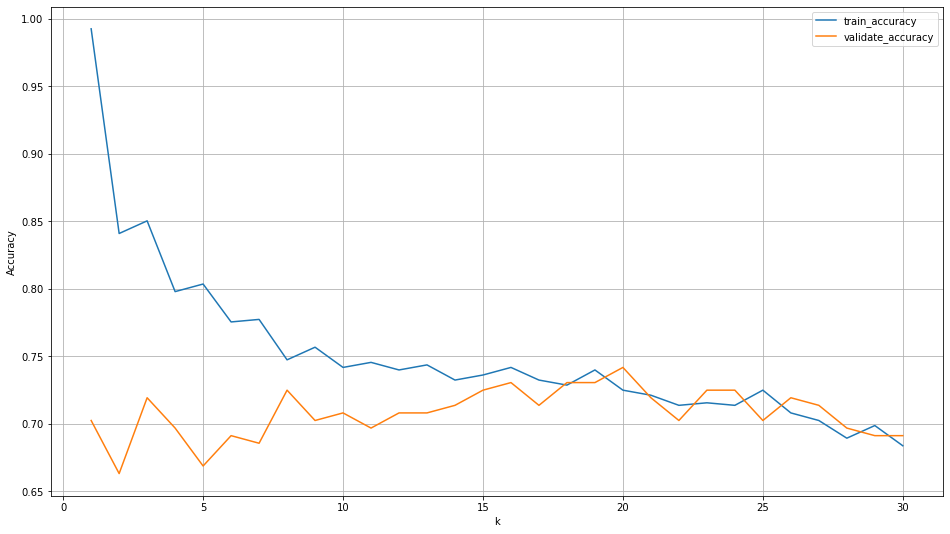

In [242]:
metrics = []

# loop through different values of k
for k in range(1, 31):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
# plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
# plt.xticks(np.arange(0,20,1))
plt.grid()

In [243]:
results['difference'] = round(results.train_accuracy - results.validate_accuracy, 2)

In [244]:
results

,k,train_accuracy,validate_accuracy,difference
0,1,0.992509,0.702247,0.29
1,2,0.840824,0.662921,0.18
2,3,0.850187,0.719101,0.13
3,4,0.797753,0.696629,0.10
4,5,0.803371,0.668539,0.13
5,6,0.775281,0.691011,0.08
6,7,0.777154,0.685393,0.09
7,8,0.747191,0.724719,0.02
8,9,0.756554,0.702247,0.05
9,10,0.741573,0.707865,0.03


***k=20 appears to be best in terms of accuracy and avoiding overfitting***

### Experiment with different k values using for loop with distance weighting

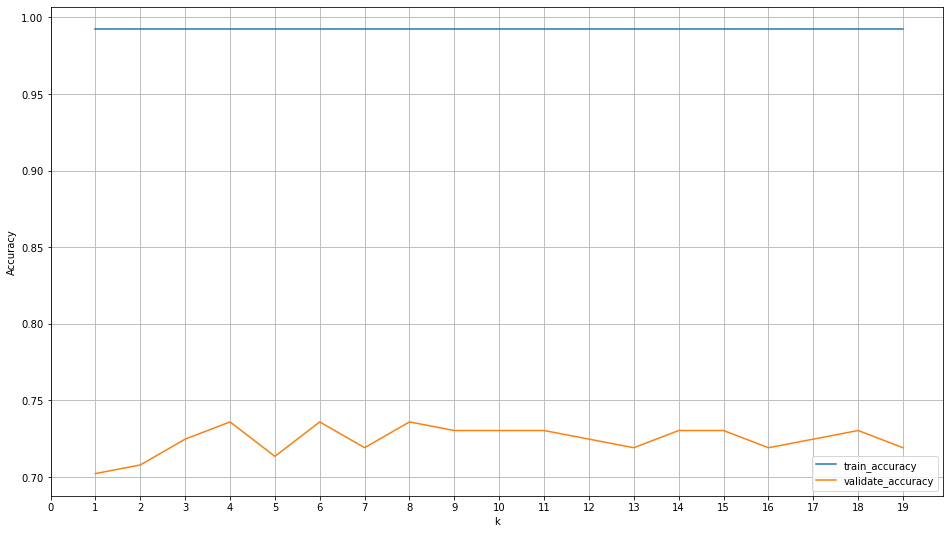

In [245]:
metrics = []

# loop through different values of k
for k in range(1, 20):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    
    # fit the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
# plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,20,1))
plt.grid()

In [246]:
results['difference'] = round(results.train_accuracy - results.validate_accuracy, 2)

In [247]:
results

,k,train_accuracy,validate_accuracy,difference
0,1,0.992509,0.702247,0.29
1,2,0.992509,0.707865,0.28
2,3,0.992509,0.724719,0.27
3,4,0.992509,0.735955,0.26
4,5,0.992509,0.713483,0.28
5,6,0.992509,0.735955,0.26
6,7,0.992509,0.719101,0.27
7,8,0.992509,0.735955,0.26
8,9,0.992509,0.730337,0.26
9,10,0.992509,0.730337,0.26


***This produces all overfit models in this specific use case***

# Logistic Regression Exercises

In these exercises, we'll continue working with the titanic dataset and building logistic regression models. **Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.**

***For all of the models you create, choose a threshold that optimizes for accuracy.***

Do your work for these exercises in either a notebook or a python script named model within your classification-exercises repository. Add, commit, and push your work.

In [248]:
train.shape, validate.shape, test.shape

((534, 10), (178, 10), (179, 10))

In [249]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0
380,1,1,42.0,0,0,227.5250,1,0,0,0
492,0,1,55.0,0,0,30.5000,1,1,0,1
55,1,1,27.0,0,0,35.5000,1,1,0,1
243,0,3,22.0,0,0,7.1250,1,1,0,1


## 1.

Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

### Baseline

In [250]:
# find baseline
train.survived.value_counts(normalize=True)

0    0.616105
1    0.383895
Name: survived, dtype: float64

**Baseline would be guessing all deaths which would have an accuracy of 0.62**

### First model using only age, fare, pclass

#### X and y

In [251]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train[['age', 'fare', 'pclass']]
y_train = train.survived

X_validate = validate[['age', 'fare', 'pclass']]
y_validate = validate.survived

X_test = test[['age', 'fare', 'pclass']]
y_test = test.survived

In [252]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


In [253]:
X_train.head(1)

,age,fare,pclass
455,29.0,7.8958,3


In [254]:
y_train.head(1)

455    1
Name: survived, dtype: int64

#### Create, fit, and transform model

In [255]:
from sklearn.linear_model import LogisticRegression

In [256]:
# Define the logistic regression model
logit = LogisticRegression(random_state=123)

In [257]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [258]:
# now use the model to make predictions
y_pred = logit.predict(X_train)

In [259]:
# take a look at predictions
y_pred[:5]

array([0, 1, 0, 1, 0])

In [260]:
# Take a look at probabilities
logit.predict_proba(X_train)[:5]

array([[0.76915676, 0.23084324],
       [0.31519717, 0.68480283],
       [0.51332405, 0.48667595],
       [0.31484293, 0.68515707],
       [0.73114467, 0.26885533]])

#### Evaluate model on train (in-sample)

In [261]:
logit.score(X_train, y_train)

0.7059925093632958

In [262]:
# confusion matrix
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[287  42]
 [115  90]]

Common Evaluation Metrics:

TPR is 0.44
TNR is 0.87
PPV is 0.68
NPV is 0.71
FPR is 0.13
FNR is 0.56
FDR is 0.32
ACC is 0.71


In [263]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.79       329
           1       0.68      0.44      0.53       205

    accuracy                           0.71       534
   macro avg       0.70      0.66      0.66       534
weighted avg       0.70      0.71      0.69       534



#### Evaluate model on validate (out-of-sample)

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [264]:
# transform for validate set
y_pred = logit.predict(X_validate)

In [265]:
# model score
logit.score(X_validate, y_validate)

0.6966292134831461

In [266]:
# confusion matrix
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[94 16]
 [38 30]]

Common Evaluation Metrics:

TPR is 0.44
TNR is 0.85
PPV is 0.65
NPV is 0.71
FPR is 0.15
FNR is 0.56
FDR is 0.35
ACC is 0.70


In [267]:
# classification report
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78       110
           1       0.65      0.44      0.53        68

    accuracy                           0.70       178
   macro avg       0.68      0.65      0.65       178
weighted avg       0.69      0.70      0.68       178



***This model does peform better than baseline (0.7 > 0.62)***

## 2.

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

### Second model using only age, fare, pclass, and sex

In [268]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


#### X and y

In [269]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train[['age', 'fare', 'pclass', 'sex_male']]
y_train = train.survived

X_validate = validate[['age', 'fare', 'pclass', 'sex_male']]
y_validate = validate.survived

X_test = test[['age', 'fare', 'pclass', 'sex_male']]
y_test = test.survived

In [270]:
X_train.head(1)

,age,fare,pclass,sex_male
455,29.0,7.8958,3,1


#### Create, fit, and transform model

In [271]:
# Define the logistic regression model
logit = LogisticRegression(random_state=123)

In [272]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [273]:
# now use the model to make predictions
y_pred = logit.predict(X_train)

In [274]:
# take a look at predictions
y_pred[:5]

array([0, 1, 0, 1, 0])

In [275]:
# Take a look at probabilities
logit.predict_proba(X_train)[:5]

array([[0.9089549 , 0.0910451 ],
       [0.11760308, 0.88239692],
       [0.67607719, 0.32392281],
       [0.49294981, 0.50705019],
       [0.89166482, 0.10833518]])

#### Evaluate model on train (in-sample)

In [276]:
logit.score(X_train, y_train)

0.797752808988764

In [277]:
# confusion matrix
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[276  53]
 [ 55 150]]

Common Evaluation Metrics:

TPR is 0.73
TNR is 0.84
PPV is 0.74
NPV is 0.83
FPR is 0.16
FNR is 0.27
FDR is 0.26
ACC is 0.80


In [278]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       329
           1       0.74      0.73      0.74       205

    accuracy                           0.80       534
   macro avg       0.79      0.79      0.79       534
weighted avg       0.80      0.80      0.80       534



#### Evaluate model on validate (out-of-sample)

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [279]:
# transform for validate set
y_pred = logit.predict(X_validate)

In [280]:
# model score
logit.score(X_validate, y_validate)

0.7865168539325843

In [281]:
# confusion matrix
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[92 18]
 [20 48]]

Common Evaluation Metrics:

TPR is 0.71
TNR is 0.84
PPV is 0.73
NPV is 0.82
FPR is 0.16
FNR is 0.29
FDR is 0.27
ACC is 0.79


In [282]:
# classification report
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        68

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



***This model does peform better than baseline (0.79 > 0.62)***

## 3.

Try out other combinations of features and models.

### Third model using all available columns

In [283]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


#### X and y

In [284]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [285]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


In [286]:
X_train.head(1)

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,29.0,0,0,7.8958,1,1,0,0


In [287]:
y_train.head(1)

455    1
Name: survived, dtype: int64

#### Create, fit, and transform model

In [288]:
# Define the logistic regression model
logit3 = LogisticRegression(random_state=123)

In [289]:
# fit the model on train data
logit3.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [290]:
# now use the model to make predictions
y_pred = logit3.predict(X_train)

In [291]:
# take a look at predictions
y_pred[:5]

array([0, 1, 0, 1, 0])

In [292]:
# Take a look at probabilities
logit3.predict_proba(X_train)[:5]

array([[0.91180445, 0.08819555],
       [0.12527541, 0.87472459],
       [0.70846191, 0.29153809],
       [0.49650487, 0.50349513],
       [0.89361631, 0.10638369]])

In [293]:
# take a look at odds for each column
np.exp(logit3.coef_)

array([[0.31279187, 0.96817721, 0.62980876, 0.9284442 , 0.99927678,
        0.55020282, 0.07932919, 2.63282906, 0.98089118]])

In [294]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit3.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
#log_coeffs

In [295]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

,coeffs
sex_male,0.079329
pclass,0.312792
alone,0.550203
sibsp,0.629809
parch,0.928444
age,0.968177
embark_town_Southampton,0.980891
fare,0.999277
embark_town_Queenstown,2.632829


**Sex, pclass, alone, sibsp, and Queenstown seem to be best predictors**

#### Evaluate model on train (in-sample)

In [296]:
logit3.score(X_train, y_train)

0.8014981273408239

In [297]:
# confusion matrix
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[280  49]
 [ 57 148]]

Common Evaluation Metrics:

TPR is 0.72
TNR is 0.85
PPV is 0.75
NPV is 0.83
FPR is 0.15
FNR is 0.28
FDR is 0.25
ACC is 0.80


In [298]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       329
           1       0.75      0.72      0.74       205

    accuracy                           0.80       534
   macro avg       0.79      0.79      0.79       534
weighted avg       0.80      0.80      0.80       534



#### Evaluate model on validate (out-of-sample)

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [299]:
# transform for validate set
y_pred = logit3.predict(X_validate)

In [300]:
# model score
logit3.score(X_validate, y_validate)

0.797752808988764

In [301]:
# confusion matrix
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[95 15]
 [21 47]]

Common Evaluation Metrics:

TPR is 0.69
TNR is 0.86
PPV is 0.76
NPV is 0.82
FPR is 0.14
FNR is 0.31
FDR is 0.24
ACC is 0.80


In [302]:
# classification report
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.69      0.72        68

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



***This model does peform better than baseline (0.8 > 0.62)***

### Fourth model using sex, pclass, alone, sibsp, and Queenstown

In [303]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


#### X and y

In [304]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train[['sex_male', 'pclass', 'alone', 'sibsp', 'embark_town_Queenstown']]
y_train = train.survived

X_validate = validate[['sex_male', 'pclass', 'alone', 'sibsp', 'embark_town_Queenstown']]
y_validate = validate.survived

X_test = test[['sex_male', 'pclass', 'alone', 'sibsp', 'embark_town_Queenstown']]
y_test = test.survived

In [305]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


In [306]:
X_train.head(1)

,sex_male,pclass,alone,sibsp,embark_town_Queenstown
455,1,3,1,0,0


In [307]:
y_train.head(1)

455    1
Name: survived, dtype: int64

#### Create, fit, and transform model

In [308]:
# Define the logistic regression model
logit = LogisticRegression(random_state=123)

In [309]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [310]:
# now use the model to make predictions
y_pred = logit.predict(X_train)

In [311]:
# take a look at predictions
y_pred[:5]

array([0, 1, 0, 0, 0])

In [312]:
# Take a look at probabilities
logit.predict_proba(X_train)[:5]

array([[0.90615143, 0.09384857],
       [0.10628277, 0.89371723],
       [0.60201226, 0.39798774],
       [0.60201226, 0.39798774],
       [0.90615143, 0.09384857]])

In [313]:
# take a look at odds for each column
np.exp(logit.coef_)

array([[0.07861892, 0.39580498, 0.49345664, 0.65358883, 1.98773164]])

In [314]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
#log_coeffs

In [315]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

,coeffs
sex_male,0.078619
pclass,0.395805
alone,0.493457
sibsp,0.653589
embark_town_Queenstown,1.987732


#### Evaluate model on train (in-sample)

In [316]:
logit.score(X_train, y_train)

0.797752808988764

In [317]:
# confusion matrix
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[285  44]
 [ 64 141]]

Common Evaluation Metrics:

TPR is 0.69
TNR is 0.87
PPV is 0.76
NPV is 0.82
FPR is 0.13
FNR is 0.31
FDR is 0.24
ACC is 0.80


In [318]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       329
           1       0.76      0.69      0.72       205

    accuracy                           0.80       534
   macro avg       0.79      0.78      0.78       534
weighted avg       0.80      0.80      0.80       534



#### Evaluate model on validate (out-of-sample)

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [319]:
# transform for validate set
y_pred = logit.predict(X_validate)

In [320]:
# model score
logit.score(X_validate, y_validate)

0.7752808988764045

In [321]:
# confusion matrix
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[92 18]
 [22 46]]

Common Evaluation Metrics:

TPR is 0.68
TNR is 0.84
PPV is 0.72
NPV is 0.81
FPR is 0.16
FNR is 0.32
FDR is 0.28
ACC is 0.78


In [322]:
# classification report
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       110
           1       0.72      0.68      0.70        68

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.78      0.77       178



***This model does peform better than baseline (0.78 > 0.62)***

## 4.

Use you best 3 models to predict and evaluate on your validate sample.

***See above, all models were already evaluated on the validate set***

## 5.

Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

**Third model was best in terms of accuracy on validate set, it will be used here on test set**

#### X and y

In [323]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [324]:
X_train.head(1)

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,29.0,0,0,7.8958,1,1,0,0


#### Evaluation on train

In [325]:
logit3.score(X_train, y_train)

0.8014981273408239

In [326]:
# now use the model to make predictions
y_pred = logit3.predict(X_train)

In [327]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       329
           1       0.75      0.72      0.74       205

    accuracy                           0.80       534
   macro avg       0.79      0.79      0.79       534
weighted avg       0.80      0.80      0.80       534



In [328]:
conf_matrix_math(y_train, y_pred)

Confusion Matrix:

[[280  49]
 [ 57 148]]

Common Evaluation Metrics:

TPR is 0.72
TNR is 0.85
PPV is 0.75
NPV is 0.83
FPR is 0.15
FNR is 0.28
FDR is 0.25
ACC is 0.80


#### Evaluation on validate

In [329]:
logit3.score(X_validate, y_validate)

0.797752808988764

In [330]:
# now use the model to make predictions
y_pred = logit3.predict(X_validate)

In [331]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.69      0.72        68

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



In [332]:
conf_matrix_math(y_validate, y_pred)

Confusion Matrix:

[[95 15]
 [21 47]]

Common Evaluation Metrics:

TPR is 0.69
TNR is 0.86
PPV is 0.76
NPV is 0.82
FPR is 0.14
FNR is 0.31
FDR is 0.24
ACC is 0.80


#### Evaluation on test

In [333]:
logit3.score(X_test, y_test)

0.7877094972067039

In [334]:
# now use the model to make predictions
y_pred = logit3.predict(X_test)

In [335]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       110
           1       0.71      0.75      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [336]:
conf_matrix_math(y_test, y_pred)

Confusion Matrix:

[[89 21]
 [17 52]]

Common Evaluation Metrics:

TPR is 0.75
TNR is 0.81
PPV is 0.71
NPV is 0.84
FPR is 0.19
FNR is 0.25
FDR is 0.29
ACC is 0.79


## Bonus 3

Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

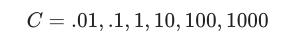

In [337]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

#### C=0.01

In [338]:
logit = LogisticRegression(C=0.01, random_state=123)

In [339]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=123)

In [340]:
logit.score(X_train, y_train)

0.7228464419475655

In [341]:
logit.score(X_validate, y_validate)

0.7247191011235955

In [342]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
#log_coeffs

In [343]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

,coeffs
sex_male,0.615992
pclass,0.757238
sibsp,0.872361
alone,0.890548
embark_town_Southampton,0.913594
age,0.983849
fare,1.008593
parch,1.039075
embark_town_Queenstown,1.049863


#### C=0.1

In [344]:
logit = LogisticRegression(C=0.1, random_state=123)

In [345]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=123)

In [346]:
logit.score(X_train, y_train)

0.8164794007490637

In [347]:
logit.score(X_validate, y_validate)

0.797752808988764

In [348]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
#log_coeffs

In [349]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

,coeffs
sex_male,0.173891
pclass,0.441421
alone,0.659474
sibsp,0.735714
embark_town_Southampton,0.824862
parch,0.972662
age,0.975291
fare,1.001375
embark_town_Queenstown,1.396250


#### C=1

In [350]:
logit = LogisticRegression(C=1, random_state=123)

In [351]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [352]:
logit.score(X_train, y_train)

0.8014981273408239

In [353]:
logit.score(X_validate, y_validate)

0.797752808988764

In [354]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
#log_coeffs

In [355]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

,coeffs
sex_male,0.079329
pclass,0.312792
alone,0.550203
sibsp,0.629809
parch,0.928444
age,0.968177
embark_town_Southampton,0.980891
fare,0.999277
embark_town_Queenstown,2.632829


#### C=10

In [356]:
logit = LogisticRegression(C=10, random_state=123)

In [357]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=10, random_state=123)

In [358]:
logit.score(X_train, y_train)

0.8033707865168539

In [359]:
logit.score(X_validate, y_validate)

0.7865168539325843

In [360]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
#log_coeffs

In [361]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

,coeffs
sex_male,0.055654
pclass,0.352743
alone,0.562426
sibsp,0.565504
parch,0.939060
age,0.966451
fare,1.001050
embark_town_Southampton,1.091397
embark_town_Queenstown,2.967410


#### C=100

In [362]:
logit = LogisticRegression(C=100, random_state=123)

In [363]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=100, random_state=123)

In [364]:
logit.score(X_train, y_train)

0.8052434456928839

In [365]:
logit.score(X_validate, y_validate)

0.8033707865168539

In [366]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
#log_coeffs

In [367]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

,coeffs
sex_male,0.062231
pclass,0.290979
alone,0.517648
sibsp,0.600468
parch,0.882642
age,0.966714
fare,0.999415
embark_town_Southampton,1.061314
embark_town_Queenstown,3.143006


#### C=1000

In [368]:
logit = LogisticRegression(C=1000, random_state=123)

In [369]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=1000, random_state=123)

In [370]:
logit.score(X_train, y_train)

0.8071161048689138

In [371]:
logit.score(X_validate, y_validate)

0.7865168539325843

In [372]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
#log_coeffs

In [373]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

,coeffs
sex_male,0.057998
pclass,0.321211
alone,0.506745
sibsp,0.547889
embark_town_Southampton,0.938536
age,0.968243
parch,0.996112
fare,0.999578
embark_town_Queenstown,3.290661


### Bonus 3 using for loop

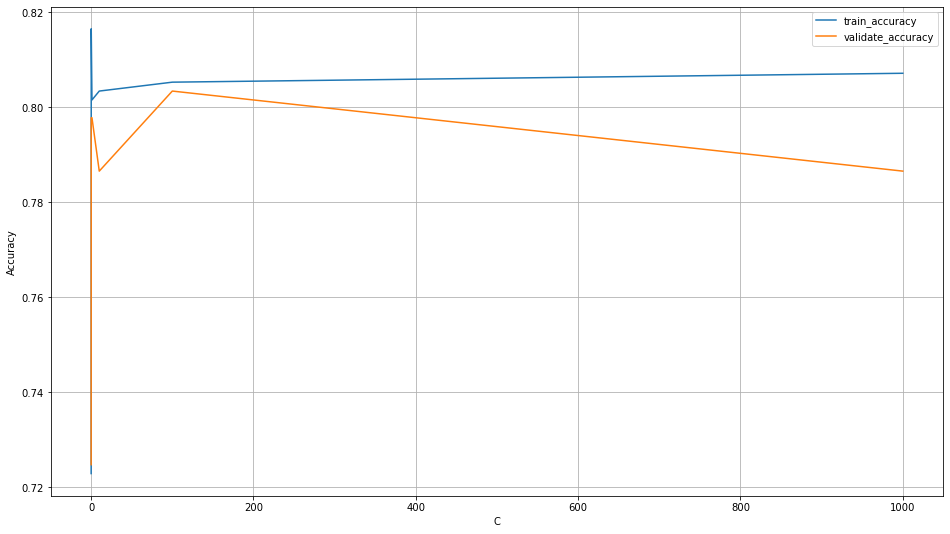

In [374]:
metrics = []
C = [0.01, 0.1, 1, 10, 100, 1000]

# loop through different values of C
for c in C:
            
    # define the thing
    logit = LogisticRegression(C=c, random_state=123)
    
    # fit the thing (remember only fit on training data)
    logit.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = logit.score(X_train, y_train)
    validate_accuracy = logit.score(X_validate, y_validate)
    
    output = {
        "C": c,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('C').plot(figsize = (16,9))
# plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
# plt.xticks(np.arange(0,20,1))
plt.grid()

In [375]:
results['difference'] = round(results.train_accuracy - results.validate_accuracy, 2)

In [376]:
results

,C,train_accuracy,validate_accuracy,difference
0,0.01,0.722846,0.724719,-0.00
1,0.10,0.816479,0.797753,0.02
2,1.00,0.801498,0.797753,0.00
3,10.00,0.803371,0.786517,0.02
4,100.00,0.805243,0.803371,0.00
5,1000.00,0.807116,0.786517,0.02


***C=100 appears to be best in terms of accuracy and avoiding overfitting***

# Experiment with different C values using for loop

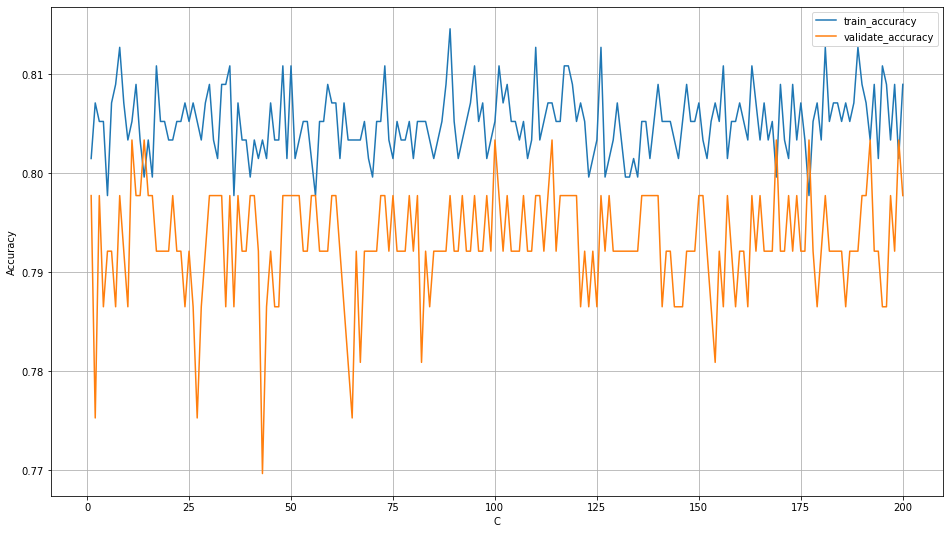

In [377]:
metrics = []

# loop through different values of C
for c in range(1, 201):
            
    # define the thing
    logit = LogisticRegression(C=c, random_state=123)
    
    # fit the thing (remember only fit on training data)
    logit.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = logit.score(X_train, y_train)
    validate_accuracy = logit.score(X_validate, y_validate)
    
    output = {
        "C": c,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('C').plot(figsize = (16,9))
# plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
# plt.xticks(np.arange(0,20,1))
plt.grid()

In [378]:
results['difference'] = round(results.train_accuracy - results.validate_accuracy, 2)

In [379]:
results

,C,train_accuracy,validate_accuracy,difference
0,1,0.801498,0.797753,0.00
1,2,0.807116,0.775281,0.03
2,3,0.805243,0.797753,0.01
3,4,0.805243,0.786517,0.02
4,5,0.797753,0.792135,0.01
...,...,...,...,...
195,196,0.808989,0.786517,0.02
196,197,0.803371,0.797753,0.01
197,198,0.808989,0.792135,0.02
198,199,0.801498,0.803371,-0.00


***Total variation is just a couple percentage points, spikes in validation accuracy are best C values in terms of accuracy and avoiding overfitting***